> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

db = pd.read_csv("diabetes.csv")
display(db.duplicated().sum())         # get the number of duplicated tuples
db.replace('?',np.NaN,inplace= True)   # replace unknown values with NaN
display(db.isnull().sum())             # get the number of NaN values in each column
display(db.info())                     
db.head()
db.Outcome.value_counts()



0

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

0    500
1    268
Name: Outcome, dtype: int64

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Check the number of zeros in each column

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


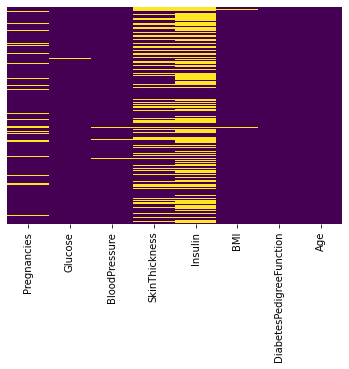

In [3]:
sns.heatmap(db.drop('Outcome', axis=1)==0,yticklabels=False,cbar=False,cmap='viridis')
print(db[db == 0].count(axis = 0))

# check the number of zeros in each column

### Remove tuples with more than 3 zerod attributes(nonsensical user-set default values) excluding pregnancies and outcome 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# sns.pairplot(db.drop('Outcome', axis=1))
db_remove_tupples = ((db.drop(['Outcome','Pregnancies'], axis=1)==0).sum(axis=1)) > 3
display(db.loc[db_remove_tupples])
print('\nCount Before')
print(db.loc[db_remove_tupples].count(axis=0), '\n') 
db.drop(index=db.loc[db_remove_tupples].index, inplace=True)
db.reset_index(inplace=True)
db.drop(columns='index', inplace=True)
db.info()
db_remove_tupples = ((db.drop(['Outcome','Pregnancies'], axis=1)==0).sum(axis=1)) > 3
print(db.loc[db_remove_tupples])

# remove tuples with more than 3 zerod attributes(nonsensical user-set default values) excluding pregnancies and outcome 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1



Count Before
Pregnancies                 7
Glucose                     7
BloodPressure               7
SkinThickness               7
Insulin                     7
BMI                         7
DiabetesPedigreeFunction    7
Age                         7
Outcome                     7
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   761 non-null    int64  
 2   BloodPressure             761 non-null    int64  
 3   SkinThickness             761 non-null    int64  
 4   Insulin                   761 non-null    int64  
 5   BMI                       761 non-null    float64
 6   DiabetesPedigreeFunction  761 non-null    float64
 7   Age                       761 non-null    int64  
 8   Outcome                   761 non-null    

Pregnancies                 110
Glucose                       5
BloodPressure                28
SkinThickness               220
Insulin                     367
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                     494
dtype: int64


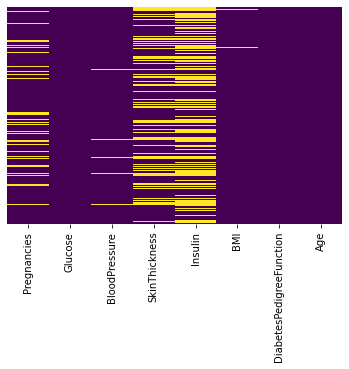

In [5]:
sns.heatmap(db.drop('Outcome', axis=1)==0,yticklabels=False,cbar=False,cmap='viridis')
print(db[db == 0].count(axis = 0))
# check the number of zeros in each column


In [6]:
db['Outcome'].value_counts()
# check if Outcome is skewed

0    494
1    267
Name: Outcome, dtype: int64

In [7]:
# db.drop('Insulin', axis=1, inplace=True)
# drop the insulin column as it has 367 zeros out of 761 entries  

db_remove_tupples = (((db.drop(['Outcome','Pregnancies'], axis=1)==0).sum(axis=1)) > 0) & (db['Outcome'] == 0)
# db.drop(columns='index', inplace=True)
display(db.loc[db_remove_tupples])
print('\nCount Before')
print(db.loc[db_remove_tupples].count(axis=0), '\n') 
db.drop(index=db.loc[db_remove_tupples].index, inplace=True)
print(db['Outcome'].value_counts())

# drop tupples with zero valued attributes and Outcome = 0 to unskew data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
749,7,137,90,41,0,32.0,0.391,39,0
751,1,106,76,0,0,37.5,0.197,26,0
755,9,89,62,0,0,22.5,0.142,33,0
757,2,122,70,27,0,36.8,0.340,27,0



Count Before
Pregnancies                 232
Glucose                     232
BloodPressure               232
SkinThickness               232
Insulin                     232
BMI                         232
DiabetesPedigreeFunction    232
Age                         232
Outcome                     232
dtype: int64 

1    267
0    262
Name: Outcome, dtype: int64


In [8]:
num_remove = 50
db_remove_tupples = db['Outcome'] == 0
# display(db.loc[db_remove_tupples])
no_diabetes_indices = db.loc[db_remove_tupples].index
# print(no_diabetes_indices)
rand_remove_indices = np.random.choice(no_diabetes_indices, num_remove)
# print(rand_remove_indices)
db.drop(index=rand_remove_indices, inplace=True)
db.reset_index(inplace=True)
db.drop(columns='index', inplace=True)
# db.info()
db['Outcome'].value_counts()
# drop 100 random tupples with Outcome=0 to unskew data

1    267
0    214
Name: Outcome, dtype: int64

<AxesSubplot:>

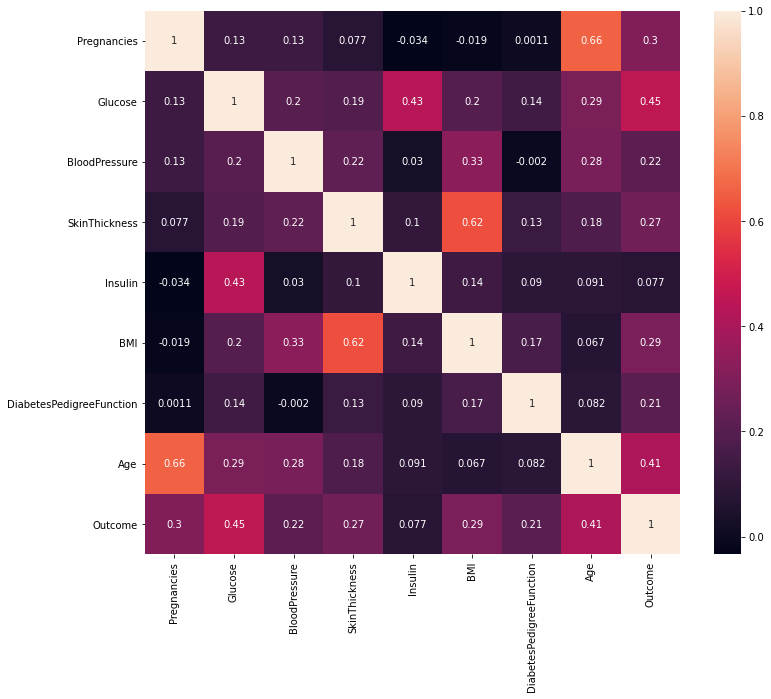

In [9]:
skin_df = db[db.SkinThickness != 0 ]
fig = plt.figure(figsize= (12,10))
sns.heatmap(skin_df.corr(), annot = True)
# check correlation of skin thickness with other attributes after removing zeros from it

<AxesSubplot:>

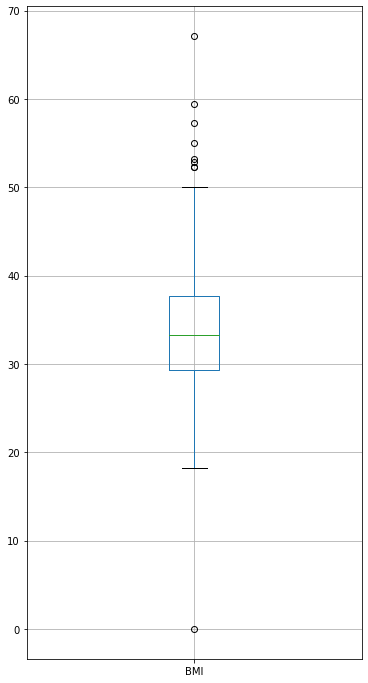

In [10]:
fig = plt.figure(figsize= (6,12))
db.boxplot(column=["BMI"])
# find IQR of BMI

In [11]:
top = 70
bottom = 5
segment = 5

print("before" , db.SkinThickness.value_counts()[0])
for i in range(int((top-bottom)/segment)):
    temp_mean = skin_df[ (skin_df.BMI > bottom+i*segment) & (skin_df.BMI < bottom + (i+1) * segment) ].SkinThickness.mean()
    db.loc[ ( db.SkinThickness == 0 ) & (db.BMI > bottom+i*segment) & (db.BMI < bottom + (i+1) * segment) , "SkinThickness" ] = temp_mean
print("after" , db.SkinThickness.value_counts()[0])
# replace skin thickness' zeros with their BMI cluster's mean value 

before 87
after 4


In [12]:
def replace_with_mean(Col):
    mean = db[Col].mean()
    print(Col, " mean = ", mean)
    db[Col].replace(0, mean, inplace = True)

replace_with_mean("BloodPressure")
# replace zero valued Bloodpressure tuples with the mean Bloodpressure value

replace_with_mean("BMI")
# replace zero valued BMI tuples with the mean BMI value


# replace_with_mean("SkinThickness")
db.head(10)

BloodPressure  mean =  70.01455301455302
BMI  mean =  33.777546777546775


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,0,33.600000,0.627,50,1
1,8,183,64.0,17.392857,0,23.300000,0.672,32,1
2,1,89,66.0,23.000000,94,28.100000,0.167,21,0
3,0,137,40.0,35.000000,168,43.100000,2.288,33,1
4,3,78,50.0,32.000000,88,31.000000,0.248,26,1
5,2,197,70.0,45.000000,543,30.500000,0.158,53,1
6,8,125,96.0,0.000000,0,33.777547,0.232,54,1
7,10,168,74.0,35.034884,0,38.000000,0.537,34,1
8,1,189,60.0,23.000000,846,30.100000,0.398,59,1
9,5,166,72.0,19.000000,175,25.800000,0.587,51,1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

<AxesSubplot:>

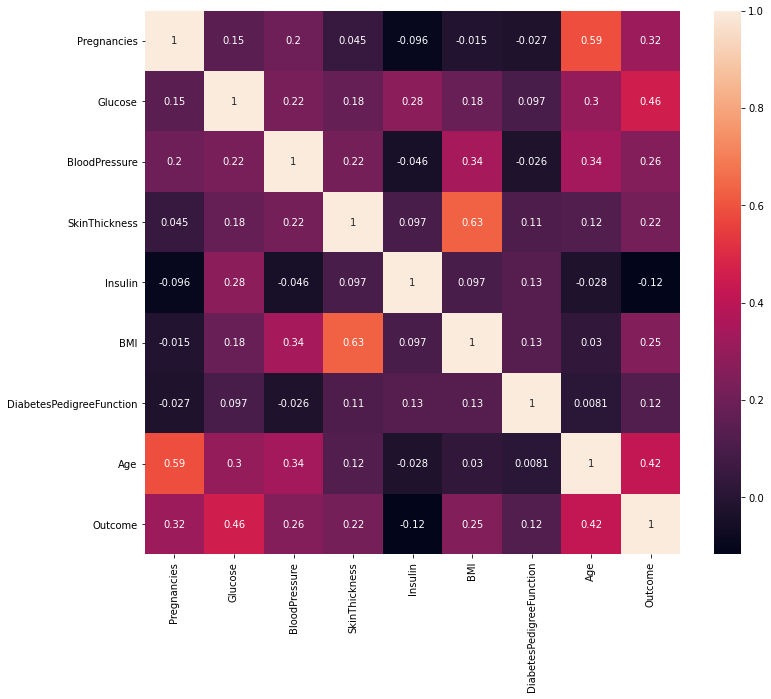

In [13]:
fig = plt.figure(figsize= (12,10))
sns.heatmap(db.corr(), annot = True)
# find correlation between each two attributes

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.



### Research Question 2  (Replace this header name!)

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.



> **Note: if you have more questions and insights don't hesitate to do it**

<a id='pre'></a>
## Build a Prediction Model


In [16]:
# Make a feature scaling
scaler = StandardScaler()
scaler.fit(db.drop(['Outcome'] ,axis= 1))
scaled = scaler.transform(db.drop(['Outcome'] ,axis=1))
db_scaled = pd.DataFrame( scaled , columns = db.columns[:-1])

db_scaled['Outcome'] = db['Outcome']
db_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.618497,0.615877,-0.016076,0.504119,-0.914910,-0.036198,0.328458,1.564936,1
1,1.200683,1.698275,-0.665747,-1.187656,-0.914910,-1.540982,0.459293,-0.097341,1
2,-0.836968,-1.208737,-0.503330,-0.648896,-0.159091,-0.839724,-1.008972,-1.113176,0
3,-1.128061,0.275695,-2.614761,0.504119,0.435916,1.351710,5.157742,-0.004992,1
4,-0.254782,-1.548919,-1.802672,0.215865,-0.207334,-0.416047,-0.773468,-0.651433,1


In [17]:
# Split the data into train and test data
train , test = train_test_split(db_scaled, test_size= 0.3)
train_x = train.drop(['Outcome'],axis = 1)
train_y = train['Outcome']
test_x = test.drop(['Outcome'],axis = 1)
test_y = test['Outcome']

## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

In [18]:
C = [0.1,1, 10, 100, 1000]
gamma = [1,0.1,0.01,0.001,0.0001]
kernel = ['rbf']
param_grid = {'C': C, 'gamma': gamma, 'kernel': kernel} 
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(train_x, train_y)
best_params_SVM = grid.best_params_
print(best_params_SVM)
grid_predictions = grid.predict(test_x)
print(grid.score(test_x, test_y))
print(confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8275862068965517
[[54 13]
 [12 66]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        67
           1       0.84      0.85      0.84        78

    accuracy                           0.83       145
   macro avg       0.83      0.83      0.83       145
weighted avg       0.83      0.83      0.83       145



In [19]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
param_grid = {'criterion': criterion, 'max_depth': max_depth} 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True)
grid.fit(train_x, train_y)
best_params_DT = grid.best_params_
print(best_params_DT)
grid_predictions = grid.predict(test_x)
print(grid.score(test_x, test_y))
print(confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions))

{'criterion': 'gini', 'max_depth': 4}
0.7931034482758621
[[46 21]
 [ 9 69]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.75        67
           1       0.77      0.88      0.82        78

    accuracy                           0.79       145
   macro avg       0.80      0.79      0.79       145
weighted avg       0.80      0.79      0.79       145



In [20]:
def fit_and_score(model):
    print(model)
    model.fit(train_x,train_y)
    predicted = model.predict(test_x)
    display (model.score(test_x,test_y) ,confusion_matrix( test_y , predicted ))
    print(classification_report(test_y , predicted))
    return model.score(test_x,test_y)

def no_print(model):
    # print(model)
    model.fit(train_x,train_y)
    predicted = model.predict(test_x)
    # display (model.score(test_x,test_y) ,confusion_matrix( test_y , predicted ))
    # print(classification_report(test_y , predicted))
    return model.score(test_x,test_y)



lr_model = LogisticRegression()
# print(lr_model)
fit_and_score(lr_model)
print()



best = 0
best_i = 0
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    temp = no_print(knn_model)
    if temp > best :
        best = temp
        best_i = i

knn_model= KNeighborsClassifier(best_i)
# print(knn_model)
fit_and_score(knn_model)
print()


svm_model = SVC(C=best_params_SVM['C'], gamma = best_params_SVM['gamma'], kernel = best_params_SVM['kernel'])
# print(svm_model)
fit_and_score(svm_model)
print()


dt_model = DecisionTreeClassifier(criterion = best_params_DT["criterion"] , max_depth = best_params_DT["max_depth"] )
# print(dt_model)
fit_and_score(dt_model)
print()


rf_model = RandomForestClassifier()
# print(rf_model)
fit_and_score(rf_model)




LogisticRegression()


0.8068965517241379

array([[52, 15],
       [13, 65]])

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        67
           1       0.81      0.83      0.82        78

    accuracy                           0.81       145
   macro avg       0.81      0.80      0.81       145
weighted avg       0.81      0.81      0.81       145


KNeighborsClassifier(n_neighbors=7)


0.7931034482758621

array([[53, 14],
       [16, 62]])

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        67
           1       0.82      0.79      0.81        78

    accuracy                           0.79       145
   macro avg       0.79      0.79      0.79       145
weighted avg       0.79      0.79      0.79       145


SVC(C=1, gamma=0.1)


0.8275862068965517

array([[54, 13],
       [12, 66]])

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        67
           1       0.84      0.85      0.84        78

    accuracy                           0.83       145
   macro avg       0.83      0.83      0.83       145
weighted avg       0.83      0.83      0.83       145


DecisionTreeClassifier(max_depth=4)


0.8

array([[47, 20],
       [ 9, 69]])

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        67
           1       0.78      0.88      0.83        78

    accuracy                           0.80       145
   macro avg       0.81      0.79      0.80       145
weighted avg       0.80      0.80      0.80       145


RandomForestClassifier()


0.8620689655172413

array([[58,  9],
       [11, 67]])

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.88      0.86      0.87        78

    accuracy                           0.86       145
   macro avg       0.86      0.86      0.86       145
weighted avg       0.86      0.86      0.86       145



0.8620689655172413

<a id='conclusions'></a>
## Conclusions

> **Tip**: , summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any staFinallytistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work send it and Congratulations!